In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [16]:
df = pd.DataFrame({
    "nome": ['Peter', 'Bruce', "T'Challa"],
    "simbolo": ['aranha', 'morcego', 'pantera'],
    "idade": [22, pd.NaT, 25]
    })

df

,nome,simbolo,idade
0,Peter,aranha,22
1,Bruce,morcego,NaT
2,T'Challa,pantera,25


In [17]:
df.dropna()

,nome,simbolo,idade
0,Peter,aranha,22
2,T'Challa,pantera,25


In [18]:
df.dropna(inplace=True)

In [19]:
df

,nome,simbolo,idade
0,Peter,aranha,22
2,T'Challa,pantera,25


## RMSE

### Manual

In [20]:
import numpy as np

# Valores reais
reais = [100000, 150000, 200000, 250000, 300000]

# Valores previstos pelo modelo
prev = [95000, 142000, 210000, 245000, 315000]

# Cálculo do RMSE
diferencas = [r - p for r, p in zip(reais, prev)]
quadrados_das_diferencas = [d ** 2 for d in diferencas]
mse = np.mean(quadrados_das_diferencas)
rmse = np.sqrt(mse)

print(f"MSE: {mse} RMSE: {rmse}")

MSE: 87800000.0 RMSE: 9370.165420097983


### Sklearn

In [21]:
from sklearn.metrics import mean_squared_error

# Valores reais
reais = [100000, 150000, 200000, 250000, 300000]

# Valores previstos pelo modelo
prev = [95000, 142000, 210000, 245000, 315000]

# Cálculo do erro quadrático médio
mse = mean_squared_error(reais, prev)
rmse = np.sqrt(mse)
print(f"Erro Quadrático Médio: {mse}")
print(f"Raiz do Erro Quadrático Médio: {rmse}")

Erro Quadrático Médio: 87800000.0
Raiz do Erro Quadrático Médio: 9370.165420097983


## MAPE - Erro percentual absoluto médio

### Manual

In [22]:
# Valores reais
reais = [100000, 150000, 200000, 250000, 300000]

# Valores previstos pelo modelo
prev = [95000, 142000, 210000, 245000, 315000]

In [23]:
erro_absoluto_percentual = []

In [29]:
for r, p in zip(reais, prev):
    erro_absoluto_percentual.append(abs(r - p) / r * 100)


In [30]:
erro_absoluto_percentual

[5.0, 5.333333333333334, 5.0, 2.0, 5.0]

In [31]:
mape = (sum(erro_absoluto_percentual) / len(erro_absoluto_percentual)) * 100

In [32]:
mape

446.6666666666667

### Sklearn

In [33]:
from sklearn.metrics import mean_absolute_percentage_error

# Valores reais
reais = [100000, 150000, 200000, 250000, 300000]

# Valores previstos pelo modelo
prev = [95000, 142000, 210000, 245000, 315000]

mape = mean_absolute_percentage_error(reais, prev)

mape

0.04466666666666667

## Imputação de valores faltantes

In [35]:
import numpy as np
from sklearn.impute import SimpleImputer

# Dados com valores ausentes
dados = np.array([
    [1, 2, 3, np.nan],
    [4, np.nan, 6, 7],
    [8, 9, 10, 11]
    ])

# Imputação com a média das colunas
# imputador = SimpleImputer(missing_values=np.nan, strategy='mean')
imputador = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dados_imputados = imputador.fit_transform(dados)

print(f"Dados após imputação: \n{dados_imputados}")

Dados após imputação: 
[[ 1.  2.  3.  7.]
 [ 4.  2.  6.  7.]
 [ 8.  9. 10. 11.]]


## Identificação de Outliers - Dados descrepantes

In [36]:
import numpy as np
	
dados = np.array([1, 2, 3, 4, 5, 100])

# quartis
q1 = np.percentile(dados, 25)
q3 = np.percentile(dados, 75)
iqr = q3 - q1

# Limite inferior e superior
limite_inf = q1 - 1.5 * iqr
limite_sup = q3 + 1.5 * iqr

outliers = np.where((dados < limite_inf) | (dados > limite_sup))[0]

print(f"Outliers por IQR: {outliers}")

Outliers por IQR: [5]


In [26]:
print(f"Nova lista sem outlier: {np.delete(dados, 5)}")

Nova lista sem outlier: [1 2 3 4 5]


## Normalização de Dados

In [37]:
from sklearn.preprocessing import normalize

# Dados a serem normalizados/padronizados
dados = np.array([2, 3, 5, 6, 7, 4, 8, 7, 6])

# Normalização entre 0 e 1
dados_normalizados = normalize([dados], norm='max')

print(f"Dados normalizados: {dados_normalizados}")

Dados normalizados: [[0.25  0.375 0.625 0.75  0.875 0.5   1.    0.875 0.75 ]]


## Padronização de Dados

### StandardScaler

In [40]:
from sklearn.preprocessing import StandardScaler

dados = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

padronizador = StandardScaler()
dados_padronizados = padronizador.fit_transform(dados)

print(f"Dados padronizados: \n{dados_padronizados}")

Dados padronizados: 
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


### Categorização

In [41]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Dados categóricos
dados_categóricos = np.array(['A', 'B', 'C', 'A', 'B'])

# Codificação one-hot encoding
codific_one_hot = OneHotEncoder()
dados_one_hot=codific_one_hot.fit_transform(dados_categóricos.reshape(-1, 1))

print(f"Dados one-hot encoding: \n{dados_one_hot.toarray()}")

# Codificação de label encoding
codificador_label = LabelEncoder()
dados_label=codificador_label.fit_transform(dados_categóricos)

print(f"\nDados label encoding: \n{dados_label}")

Dados one-hot encoding: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]

Dados label encoding: 
[0 1 2 0 1]


## Calculo das métricas de acuracia, precisao, revocacao e f1-score

In [42]:
total = 1000
vp = 150
vn = 700
fp = 50
fn = 50

## Acurácia

In [44]:
acuracia = vp / total
print(f"Acurácia: {acuracia}")

Acurácia: 0.15


## Precisão

In [45]:
precisao = vp / (vp + fp)
print(f"Precisão: {precisao}")


Precisão: 0.75


## Revocação

In [46]:
revocacao = vp / (vp + fn)
print(f"Revocação: {revocacao}")

Revocação: 0.75


## f1-score

In [47]:
f1 = 2 * (precisao * revocacao) / (precisao + revocacao)
print(f"F1 Score: {f1}")


F1 Score: 0.75


### Exemplos de Métricas de Avaliação

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_real = [1, 0, 1, 0]

# Previsões do modelo (código de obtenção das previsões do modelo)
y_pred = [0, 1, 1, 1]

# Métricas de avaliação
print(f'Acurária: {accuracy_score(y_real, y_pred)}')
print(f'Precisão: {precision_score(y_real, y_pred)}')
print(f'Revocação: {recall_score(y_real, y_pred)}')
print(f'F1-Score: {f1_score(y_real, y_pred)}')

Acurária: 0.25
Precisão: 0.3333333333333333
Revocação: 0.5
F1-Score: 0.4


In [50]:
from sklearn.metrics import classification_report

target_names = ['Classe 0', 'Classe 1']

print(classification_report(y_real, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Classe 0       0.00      0.00      0.00         2
    Classe 1       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4



## Matriz de Confusão

### Modelo para classificar imagens de cachorro

In [51]:
from sklearn.metrics import confusion_matrix

y_real_animais = ["cachorro", "gato", "cachorro", "gato"]
y_pred_animais = ["gato", "cachorro", "cachorro", "cachorro"]

# Matriz de confusão
cm = confusion_matrix(y_real_animais, y_pred_animais, labels=["cachorro", "gato"])
print("Matriz de Confusão:")
print(cm)

Matriz de Confusão:
[[1 1]
 [2 0]]


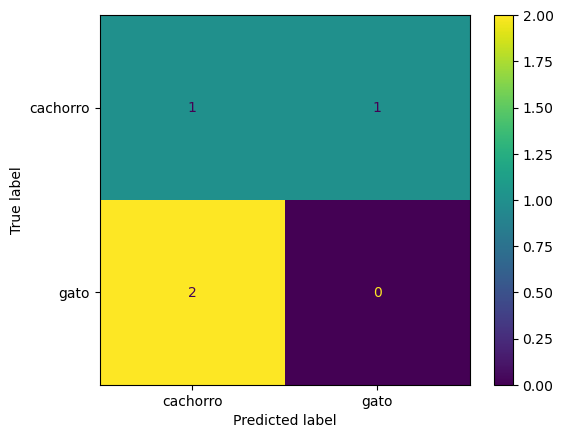

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_real_animais, y_pred_animais, labels=["cachorro", "gato"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["cachorro", "gato"])
disp.plot()
plt.show()